In [1]:
%matplotlib inline # 画图时自动嵌入matplotlib
import torch
import random
from d2l import torch as d2l

In [15]:
# 生成数据
def synthetic_data(w, b, nums_examples):
    X = torch.normal(0, 1, (nums_examples, len(w)))
    y = torch.matmul(X, w)+b
    y+= torch.normal(0, 0.001, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [16]:
featuers.shape

torch.Size([1000, 2])

In [17]:
labels.shape

torch.Size([1000, 1])

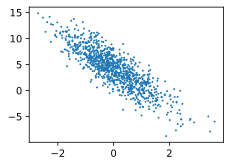

In [18]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

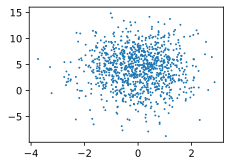

In [19]:
d2l.plt.scatter(featuers[:, 0].detach().numpy(), labels.detach().numpy(), 1)

In [23]:
# 创建batch产生样本的函数
def data_iter(features, labels, batch_size):
    num_examples = features.shape[0]
    sample_indices = list(range(num_examples))
    random.shuffle(sample_indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(sample_indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices] 
    
batch_size = 10
for X, y in data_iter(features, labels, batch_size):
    print(X, '\n', y)
    break

tensor([[ 1.4813,  0.3643],
        [-0.2923, -0.6704],
        [-0.1366,  1.2893],
        [-1.6082,  0.7204],
        [ 1.3096, -0.1428],
        [ 0.1369, -0.5294],
        [-0.8629, -0.4161],
        [-0.5830, -1.2426],
        [-0.1361,  1.0380],
        [-0.5617, -0.8905]]) 
 tensor([[ 5.9235],
        [ 5.8983],
        [-0.4563],
        [-1.4657],
        [ 7.3051],
        [ 6.2758],
        [ 3.8900],
        [ 7.2585],
        [ 0.3984],
        [ 6.1045]])


In [49]:
# 定义初始化参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b =  torch.normal(0, 0.01, size=(1, ), requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [42]:
# 均方损失
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_() # 手动梯度设置0

In [50]:
# 训练
lr = 0.000000000001
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(features,labels, batch_size):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epoch:', epoch+1, ' loss:' ,train_l.mean() , ' w:' ,w , ' b:' ,b, )

epoch: 1  loss: tensor(15.8762)  w: tensor([[0.0013],
        [0.0028]], requires_grad=True)  b: tensor([-0.0014], requires_grad=True)
epoch: 2  loss: tensor(15.8762)  w: tensor([[0.0013],
        [0.0028]], requires_grad=True)  b: tensor([-0.0014], requires_grad=True)
epoch: 3  loss: tensor(15.8762)  w: tensor([[0.0013],
        [0.0028]], requires_grad=True)  b: tensor([-0.0014], requires_grad=True)


## 线性回归的简洁实现

In [51]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [52]:
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.0248, -0.0652],
         [-0.0690,  0.7559],
         [-1.2528,  0.7878],
         [ 0.3531, -1.4755],
         [-2.0445, -0.2756],
         [ 0.3898,  0.0544],
         [ 2.1266, -0.5433],
         [-0.6574,  0.8422],
         [ 1.4356, -0.1076],
         [-0.5710, -0.3038]]),
 tensor([[ 4.3892e+00],
         [ 1.4957e+00],
         [-9.7388e-01],
         [ 9.9198e+00],
         [ 1.0548e+00],
         [ 4.7943e+00],
         [ 1.0303e+01],
         [ 2.6949e-03],
         [ 7.4439e+00],
         [ 4.0980e+00]])]

In [53]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [54]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [55]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000236
epoch 2, loss 0.000108
epoch 3, loss 0.000107
